In [2]:
! pip install pandas numpy scikit-learn tensorflow 

  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [3]:
! pip install tensorflow keras scikit-learn joblib


In [4]:
! pip install keras


In [6]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler  # Add this import


In [ ]:
#using Tensorflow

In [7]:
# LOAD THE DATA
train = pd.read_csv(r"C:\Users\sandeep\Desktop\personal_project\NUMBER_RECOGNITION_MNIST_DATASET\train.csv")
test = pd.read_csv(r"C:\Users\sandeep\Desktop\personal_project\NUMBER_RECOGNITION_MNIST_DATASET\test.csv")


In [8]:
Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
Y_train = to_categorical(Y_train, num_classes=10)


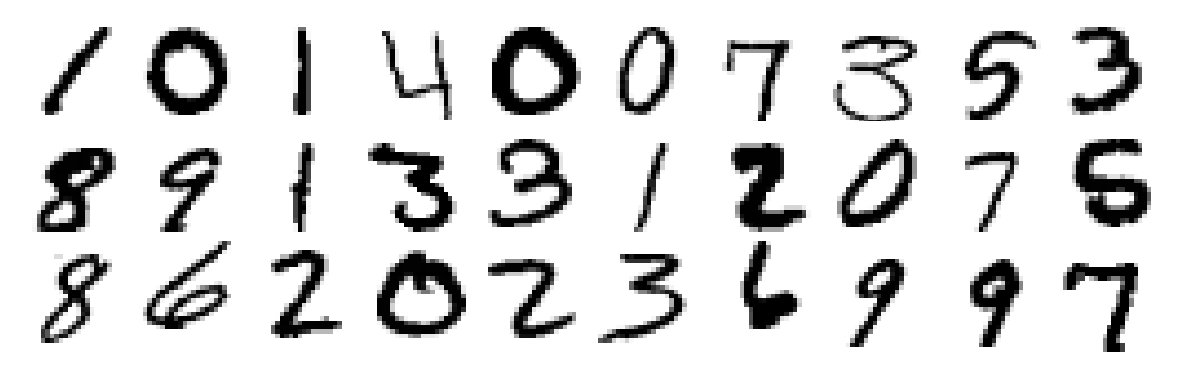

In [9]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [10]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)


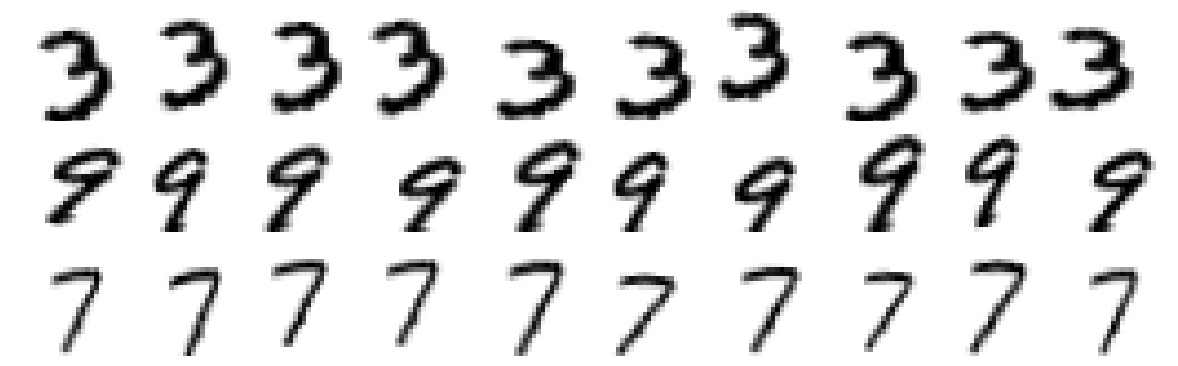

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have already created an ImageDataGenerator instance named 'datagen'
# and loaded your dataset into X_train and Y_train

# Preview Augmented Images
X_train3 = X_train[9].reshape((1, 28, 28, 1))
Y_train3 = Y_train[9].reshape((1, 10))
plt.figure(figsize=(15, 4.5))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    X_train2, Y_train2 = next(datagen.flow(X_train3, Y_train3))
    plt.imshow(X_train2[0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis('off')
    if i == 9:
        X_train3 = X_train[11].reshape((1, 28, 28, 1))
        Y_train3 = Y_train[11].reshape((1, 10))  # Update the label as well
    if i == 19:
        X_train3 = X_train[18].reshape((1, 28, 28, 1))
        Y_train3 = Y_train[18].reshape((1, 10))  # Update the label as well
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the feature maps for the fully connected layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()



C:\Users\sandeep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf

# Create a TensorFlow Dataset for efficient data loading
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=50000).batch(128)

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Define a simpler data augmentation strategy
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Modify the learning rate scheduler
annealer = tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr * 0.99)


In [15]:
epochs = 15
batch_size = 128

X_val2, Y_val2 = X_train2[:5000], Y_train2[:5000]  # Use a smaller validation set

history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=(X_val2, Y_val2),
    callbacks=[early_stopping, annealer],
)

Epoch 1/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 48s 138ms/step - accuracy: 0.7474 - loss: 0.8070 - val_accuracy: 1.0000 - val_loss: 0.1757 - learning_rate: 9.9000e-04
Epoch 2/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 47s 141ms/step - accuracy: 0.9646 - loss: 0.1124 - val_accuracy: 1.0000 - val_loss: 0.1728 - learning_rate: 9.8010e-04
Epoch 3/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 60s 183ms/step - accuracy: 0.9750 - loss: 0.0793 - val_accuracy: 1.0000 - val_loss: 0.2007 - learning_rate: 9.7030e-04
Epoch 4/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 68s 205ms/step - accuracy: 0.9831 - loss: 0.0553 - val_accuracy: 1.0000 - val_loss: 0.0670 - learning_rate: 9.6060e-04
Epoch 5/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 62s 187ms/step - accuracy: 0.9844 - loss: 0.0483 - val_accuracy: 1.0000 - val_loss: 0.5715 - learning_rate: 9.5099e-04
Epoch 6/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 61s 185ms/step - accuracy: 0.9867 - loss: 0.0416 - val_accuracy: 1.0000 - val_loss: 0.3166 - learning_rate: 9.4148e-04
Epoch 7/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 57s 17

In [16]:
print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    epochs,
    int(max(history.history['accuracy'])),  # Format accuracy as an integer
    max(history.history['accuracy']),  # Use index 1 for training accuracy
    max(history.history['val_accuracy']),  # Use index 2 for validation accuracy
))



CNN 15: Epochs=0, Train accuracy=0.99240, Validation accuracy=1.00000


In [17]:
import numpy as np
import pandas as pd

# Assuming X_test is a Pandas DataFrame
# Convert it to a NumPy array
X_test_array = X_test.values

# Reshape the NumPy array
X_test_array = X_test_array.reshape(-1, 28, 28, 1)

# Perform predictions
results = model.predict(X_test_array)
results = np.argmax(results, axis=1)

# Convert the NumPy array to a Pandas Series
results_series = pd.Series(results, name="Label")

# Create a submission dataframe
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), results_series], axis=1)

# Save the submission to a CSV file
submission.to_csv("MNIST-CNN-NUMBER-RECOGNITION-ENSEMBLE.csv", index=False)




875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


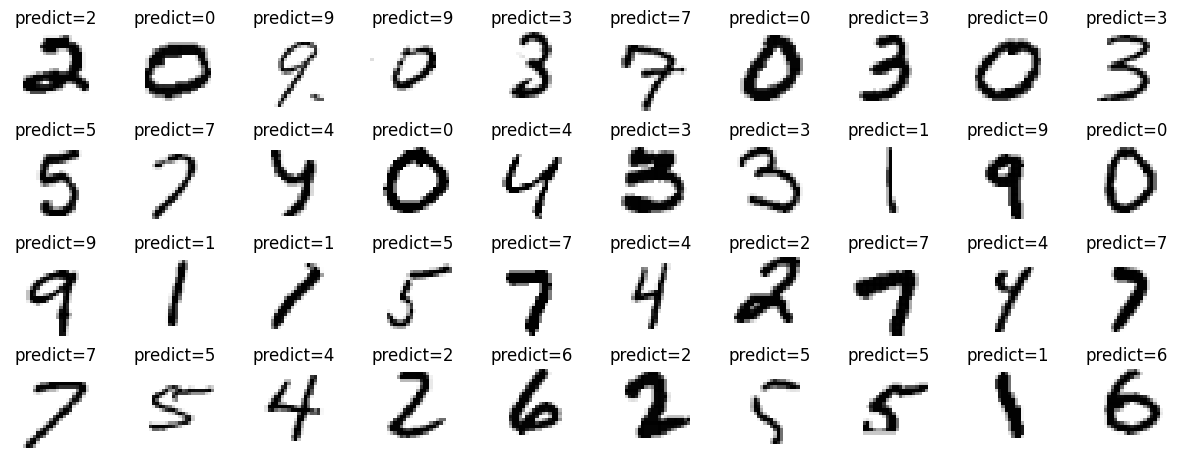

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X_test_array[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i], y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()



In [ ]:
#Accuracy 98.767 %

In [19]:
import pickle
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained Keras Sequential model
model.save('mnist_cnn_model.h5')

# Load the model
model = load_model('mnist_cnn_model.h5')

# Save the model as a pickle file
with open('mnist_cnn_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [20]:
# Train your model (code omitted for brevity)

# Save the model as HDF5 file
model.save('mnist_cnn_model.h5')

# Optionally, save the model's architecture as JSON
model_json = model.to_json()
with open("mnist_cnn_model.json", "w") as json_file:
    json_file.write(model_json)


In [21]:
model.save('my_model.keras')
